![Astrofisica Computacional](../../../logo.png)

---
##  `FITS` File (Images) II


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Summary

In this notebook we will use `astropy` to read a .fits file and display its contents as an astronomical image.

---

## FITS files of images with different filters

On this occasion, a set of FITS images of the galaxy M31, obtained from the SIMBAD Database, will be used. First go to the portal

http://cdsportal.u-strasbg.fr/?target=andromeda

In the Tabular Data section, go to the images tab and download the files

m31_sdss_obs_flux_attcorr_nomask_g.fit\
m31_sdss_obs_flux_attcorr_nomask_r.fit \
m31_sdss_obs_flux_attcorr_nomask_u.fit \
m31_sdss_obs_flux_attcorr_nomask_i.fit

which correspond to photometric images with the [filters](https://en.wikipedia.org/wiki/Photometric_system): *g*, *r*, *u* and *i*.


---

## 1. Read the information from the .fits file

Now we will read the HDU information in the file, a list-like collection of HDU (Header Data Unit) objects.

In [1]:
from matplotlib import pyplot as plt
from astropy.io import fits
import numpy as np

with fits.open('data/m31_sdss_obs_flux_attcorr_nomask_r.fit') as hdul:
    hdul.info() 

Filename: data/m31_sdss_obs_flux_attcorr_nomask_r.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      59   (2300, 7400)   float32   


Here there is only one HDU (Primary) with the photometric information in an array of size (2300,7400).

The Header gives us the complete information,

In [2]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2300                                                  
NAXIS2  =                 7400                                                  
COMMENT Keywords relevant for current image:                                    
CREATOR = 'Taavi Tuvikene & Elmo Tempel' / Creators of the present image        
COMM2   = 'Image is intrinsic attenuation corrected.'                           
MODELDAT= '08.okt 2010'        / Model creation date                            
DATE_MOD= '2011-02-25 18:58'   / file modification date                         
BUNIT   = 'nanomaggies/px'     / They are 10^9 times the flux: m=22.5-2.5log(f) 
PIX_SIZE=                 3.96 / pixel scale (arcsec)                           
MASKED  = 'false   '        

Now we read the data and assign it to an object in Python,

In [3]:
hdul = fits.open('data/m31_sdss_obs_flux_attcorr_nomask_r.fit')
image_data = hdul[0].data
hdul.close()

image_data.shape

(7400, 2300)

## 2. Image Display

When visualizing with a gray color mada one has

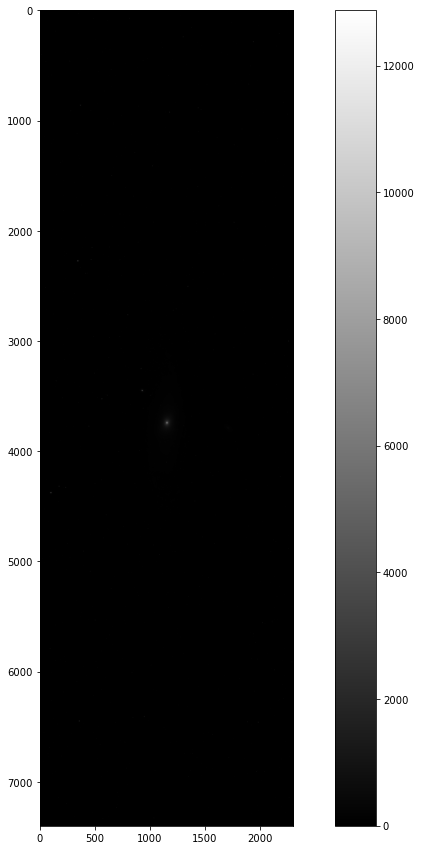

In [4]:
plt.figure(figsize=(15,15))
plt.imshow(image_data, cmap='gray')
plt.colorbar()
plt.show()

The image is almost completely dark. Changing the color map does not give a better result,

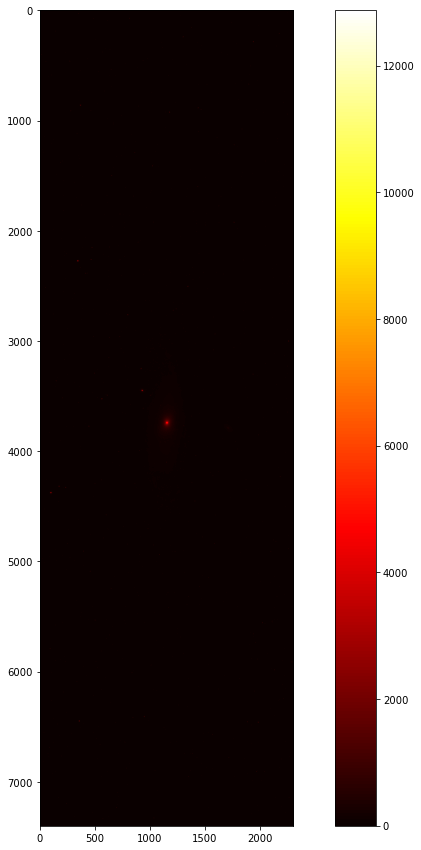

In [5]:
plt.figure(figsize=(15,15))
plt.imshow(image_data, cmap='hot')
plt.colorbar()
plt.show()

These results are due to the wide range of values that the numbers take within the array. To improve the image we will use a logarithmic scale,

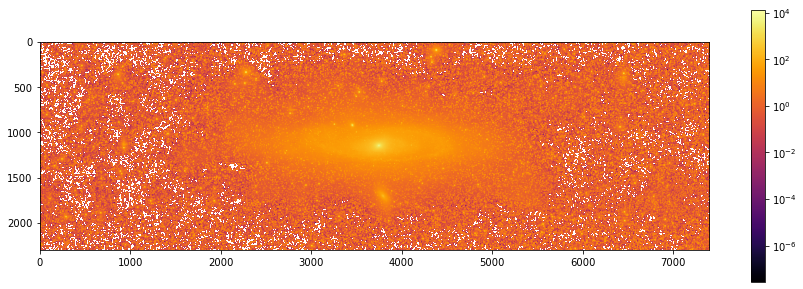

In [16]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(15,5))
plt.imshow(image_data.T, cmap='inferno', norm=LogNorm())
plt.colorbar()
plt.show()

There seems to be a lot of noise. In order to understand this behavior, let us analyize the data. First, note that the set includes negative values,

In [7]:
image_data

array([[-1.74176410e-01, -3.42591822e-01, -4.47588742e-01, ...,
         1.53360935e-02, -6.94026500e-02, -1.05542384e-01],
       [-8.95968303e-02,  4.16028872e-02, -7.95166865e-02, ...,
         3.08462828e-01, -1.74805447e-02,  3.27246487e-01],
       [-2.74676122e-02,  2.38904372e-01,  3.01361799e-01, ...,
        -6.34999931e-01, -3.53697618e-03,  7.25125074e-01],
       ...,
       [ 3.21048212e+00, -6.62057340e-01, -8.03315733e-03, ...,
         1.25122890e-01, -1.81493089e-01,  9.38122272e-01],
       [ 1.92710519e-01, -7.20745921e-01, -1.34178013e-01, ...,
         3.89773697e-01,  4.43804801e-01,  9.37658027e-02],
       [ 1.95140481e+00, -2.45626569e-02, -3.94979149e-01, ...,
         3.67988892e+01,  1.31365669e+00,  1.60302550e-01]], dtype=float32)

The minimum value is

In [9]:
np.min(image_data)

-3.081798

Now we will modify the data using this value and plot

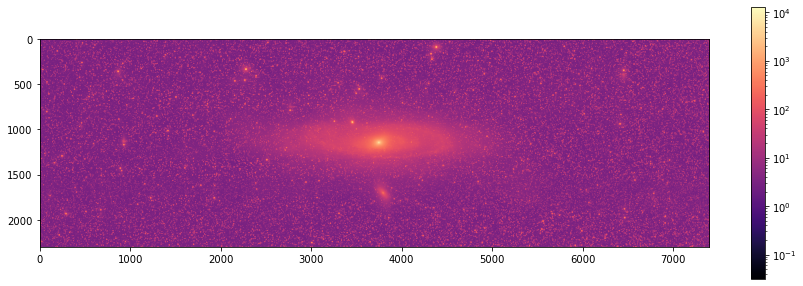

In [17]:
image_data2 = image_data - np.min(image_data)

from matplotlib.colors import LogNorm
plt.figure(figsize=(15,5))
plt.imshow(image_data2.T, cmap='magma', norm=LogNorm())
plt.colorbar()
plt.show()